## Univariate

## Using Mutual Information Gain

### Classification Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [4]:
data = pd.read_csv('santander-train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
X = data.drop(labels=['TARGET'], axis=1)
y = data['TARGET']

In [6]:
print(X.shape)
print(y.shape)

(76020, 370)
(76020,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
### Removing Constants, Quasi Constants and Duplicate Features

In [9]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0.01)

In [10]:
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [11]:
print(X_train_filter.shape)
print(X_test_filter.shape)

(57015, 272)
(19005, 272)


In [12]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [13]:
print(type(X_train_T))
print(type(X_test_T))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [15]:
X_train_T.duplicated().sum()  ## Number of duplicate Features

17

In [16]:
duplicated_features = X_train_T.duplicated()
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [17]:
print(X_train_unique.shape)
print(X_test_unique.shape)

(57015, 255)
(19005, 255)


In [18]:
### Calculating Mutual Information gain between each feature and Target 

In [19]:
mi = mutual_info_classif(X_train_unique, y_train)

In [20]:
print(type(mi))

<class 'numpy.ndarray'>


In [21]:
mi

array([8.94550619e-04, 9.03515337e-04, 1.33003603e-02, 0.00000000e+00,
       6.71817795e-05, 3.62315820e-04, 3.56386717e-04, 1.60291120e-04,
       0.00000000e+00, 2.46436083e-04, 6.86225795e-05, 1.12317065e-03,
       3.62206502e-04, 1.09594126e-03, 1.07944044e-03, 6.76562325e-04,
       0.00000000e+00, 1.21252236e-03, 8.01205894e-04, 1.28622830e-03,
       3.09868030e-04, 1.07841185e-02, 1.44185851e-02, 1.79879081e-03,
       0.00000000e+00, 2.23672560e-03, 3.35486473e-04, 2.72095319e-04,
       1.61259831e-03, 1.08256862e-03, 1.64785788e-03, 5.74525794e-04,
       4.17045670e-04, 6.37153784e-04, 8.97948725e-04, 0.00000000e+00,
       3.05310064e-04, 1.36889371e-04, 5.79055563e-04, 1.71924198e-02,
       4.02114844e-04, 3.33982802e-04, 1.09111320e-02, 1.45835008e-03,
       1.10809615e-02, 0.00000000e+00, 3.36505872e-04, 1.38071446e-02,
       1.28546019e-02, 1.71389716e-02, 1.65078615e-03, 2.56898609e-04,
       2.66344410e-03, 2.86981737e-04, 0.00000000e+00, 4.69442039e-04,
      

In [22]:
print(len(mi))

255


In [23]:
mi = pd.Series(mi, index=X_train_unique.columns)
mi

0      0.000895
1      0.000904
2      0.013300
3      0.000000
4      0.000067
5      0.000362
6      0.000356
7      0.000160
8      0.000000
9      0.000246
10     0.000069
11     0.001123
12     0.000362
13     0.001096
14     0.001079
15     0.000677
16     0.000000
17     0.001213
18     0.000801
19     0.001286
20     0.000310
21     0.010784
22     0.014419
23     0.001799
24     0.000000
25     0.002237
26     0.000335
27     0.000272
28     0.001613
29     0.001083
         ...   
241    0.000466
242    0.000711
243    0.000000
244    0.002564
245    0.001969
246    0.000946
247    0.001224
248    0.001037
249    0.000029
250    0.000000
251    0.001200
252    0.000000
253    0.000000
255    0.000000
256    0.000000
257    0.000000
258    0.000070
259    0.001138
260    0.000736
261    0.000528
262    0.000539
263    0.000000
264    0.000000
265    0.000930
266    0.000000
267    0.000000
268    0.000560
269    0.000000
270    0.000701
271    0.001741
Length: 255, dtype: floa

In [24]:
mi.sort_values(ascending=False, inplace=True)
mi

41     0.017192
52     0.017139
88     0.017066
103    0.015895
205    0.015328
93     0.015135
22     0.014419
50     0.013807
2      0.013300
123    0.013067
51     0.012855
130    0.012532
233    0.011348
47     0.011081
235    0.011079
45     0.010911
102    0.010893
21     0.010784
132    0.010260
107    0.009886
97     0.009243
100    0.009171
236    0.009102
210    0.009045
87     0.008810
234    0.008799
110    0.002703
55     0.002663
244    0.002564
25     0.002237
         ...   
134    0.000000
64     0.000000
105    0.000000
65     0.000000
228    0.000000
76     0.000000
78     0.000000
82     0.000000
84     0.000000
226    0.000000
94     0.000000
95     0.000000
197    0.000000
221    0.000000
219    0.000000
218    0.000000
129    0.000000
108    0.000000
217    0.000000
216    0.000000
114    0.000000
115    0.000000
215    0.000000
120    0.000000
214    0.000000
125    0.000000
126    0.000000
127    0.000000
128    0.000000
136    0.000000
Length: 255, dtype: floa

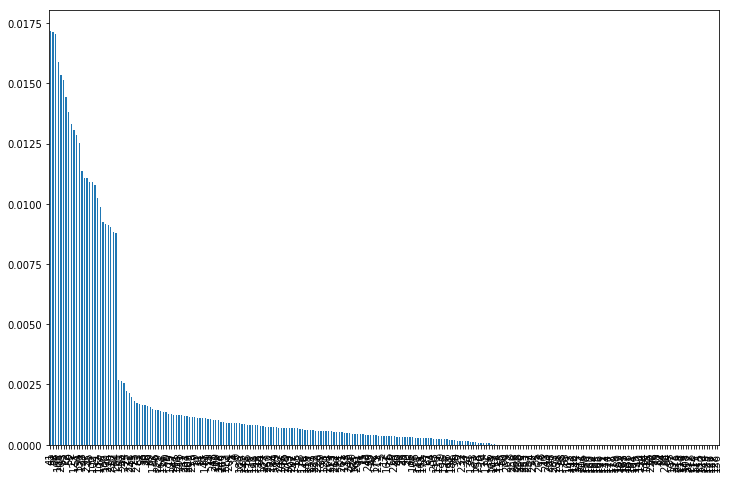

In [25]:
plt.figure()
mi.plot.bar(figsize = (12, 8))

In [26]:
### From the graph we can see that at rhe end values gave MI==0 which means they are not putting much information indivisually but in a group they may put information

In [27]:
### Selecting top 10 percentile of the features 

In [28]:
sel = SelectPercentile(score_func=mutual_info_classif, percentile=10)
sel.fit(X_train_unique, y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([  2,  21,  22,  41,  45,  47,  50,  51,  52,  87,  88,  93,  97,
            100, 102, 103, 107, 123, 130, 132, 205, 210, 233, 234, 235, 236],
           dtype='int64')

In [29]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)

In [30]:
print(X_train_mi.shape)
print(X_test_mi.shape)

(57015, 26)
(19005, 26)


In [31]:
%%time
model = RandomForestClassifier(n_estimators=100, max_depth=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.959431728492502
Wall time: 6.5 s


In [32]:
%%time
model = RandomForestClassifier(n_estimators=100, max_depth=4)
model.fit(X_train_mi, y_train)
y_pred = model.predict(X_test_mi)
print(accuracy_score(y_test, y_pred))

0.959431728492502
Wall time: 2.4 s


### Regression Problem

In [33]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [34]:
boston = load_boston()

In [35]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [36]:
X = pd.DataFrame(data = boston.data, columns= boston.feature_names)
print(X.shape)

(506, 13)


In [37]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
y = boston.target
print(y[: 5])

[24.  21.6 34.7 33.4 36.2]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
mi = mutual_info_regression(X_train, y_train)

In [41]:
print(len(mi))

13


In [42]:
mi

array([2.99951431e-01, 1.43247778e-01, 4.38566164e-01, 3.85464658e-04,
       4.13610240e-01, 5.31037042e-01, 3.08638119e-01, 2.64890894e-01,
       1.84901879e-01, 3.41865725e-01, 4.33617543e-01, 1.86900020e-01,
       6.43439919e-01])

In [43]:
mi = pd.Series(mi, index=X.columns)

In [44]:
mi

CRIM       0.299951
ZN         0.143248
INDUS      0.438566
CHAS       0.000385
NOX        0.413610
RM         0.531037
AGE        0.308638
DIS        0.264891
RAD        0.184902
TAX        0.341866
PTRATIO    0.433618
B          0.186900
LSTAT      0.643440
dtype: float64

In [45]:
mi.sort_values(ascending=False, inplace=True)

In [46]:
mi

LSTAT      0.643440
RM         0.531037
INDUS      0.438566
PTRATIO    0.433618
NOX        0.413610
TAX        0.341866
AGE        0.308638
CRIM       0.299951
DIS        0.264891
B          0.186900
RAD        0.184902
ZN         0.143248
CHAS       0.000385
dtype: float64

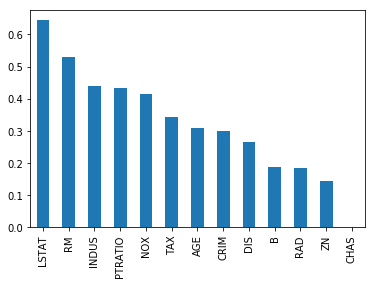

In [47]:
plt.figure()
mi.plot.bar()

In [48]:
sel = SelectKBest(score_func=mutual_info_regression, k=8)
sel.fit(X_train, y_train)
X_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [49]:
X_train_mi = sel.transform(X_train)
X_test_mi = sel.transform(X_test)

In [50]:
%%time
model = LinearRegression()
model.fit(X_train_mi, y_train)
y_pred = model.predict(X_test_mi)
print(r2_score(y_test, y_pred))

0.6946358736819169
Wall time: 1.16 s


In [51]:
%%time
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.7606186905933202
Wall time: 202 ms
